In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_companies = pd.read_csv(r'sp500_companies.csv', delimiter = ',')
df_index = pd.read_csv(r'sp500_index.csv', delimiter = ',')
df_stocks = pd.read_csv(r'sp500_stocks.csv', delimiter = ',')


Valores ausentes:
 S&P500    0
dtype: int64


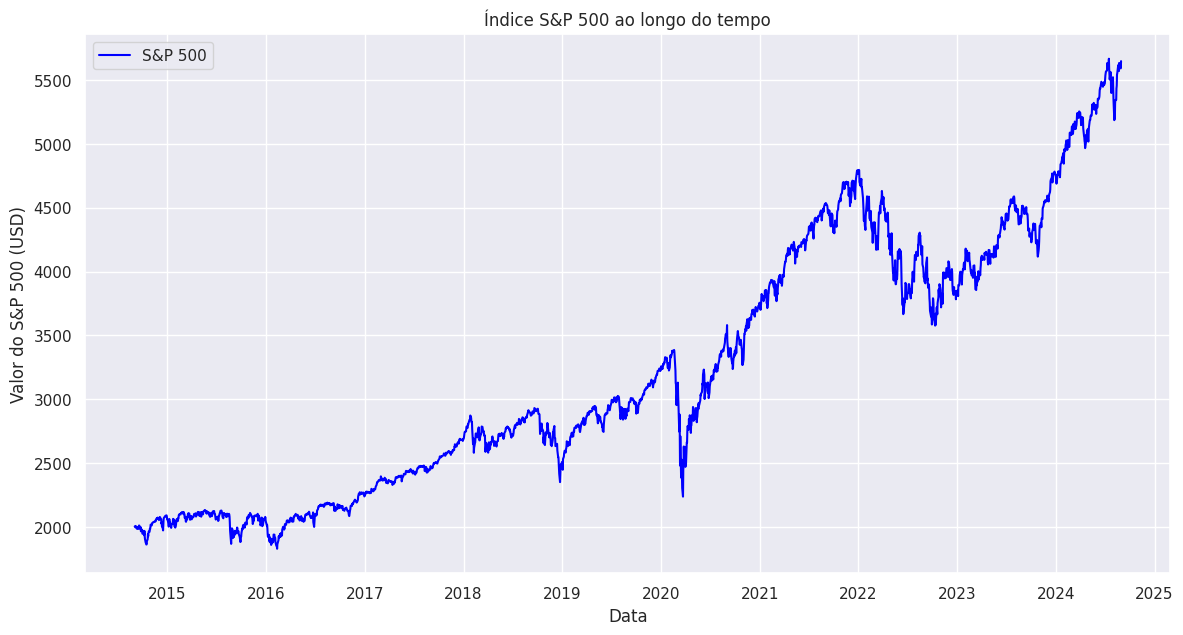

In [3]:

# Converter a coluna 'Date' para datetime (ajustando o formato para 'YYYY-MM-DD')
df_index['Date'] = pd.to_datetime(df_index['Date'], format='%Y-%m-%d')

# Definir a coluna 'Date' como índice e ordernar dados por data
df_index.set_index('Date', inplace=True)
df_index.sort_index(inplace=True)

# Verificar se há valores ausentes e preencher valores
print("Valores ausentes:\n", df_index.isna().sum())
df_index['S&P500'] = df_index['S&P500'].ffill()


# Gráfico variação temporal do índice S&P500
sns.set(style="dark")
plt.figure(figsize=(14, 7))
plt.plot(df_index.index, df_index['S&P500'], label='S&P 500', color='blue')
plt.title('Índice S&P 500 ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor do S&P 500 (USD)')
plt.legend()
plt.grid(True)
plt.show()


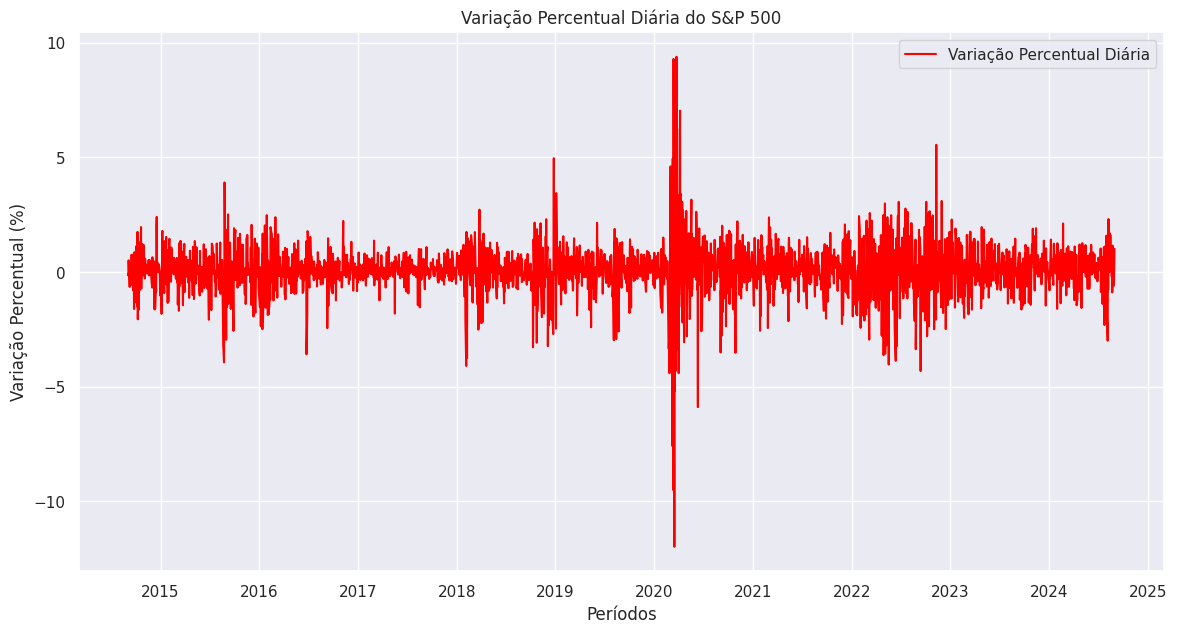

In [4]:
# Calcular a variação percentual diária
df_index['Daily Change'] = df_index['S&P500'].pct_change() * 100

# Gráfico da variação percentual diária
sns.set(style="dark")
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_index.index, y=df_index['Daily Change'], color='red', label='Variação Percentual Diária')
plt.title('Variação Percentual Diária do S&P 500')
plt.xlabel('Períodos')
plt.ylabel('Variação Percentual (%)')
plt.legend()
plt.grid(True)
plt.show()


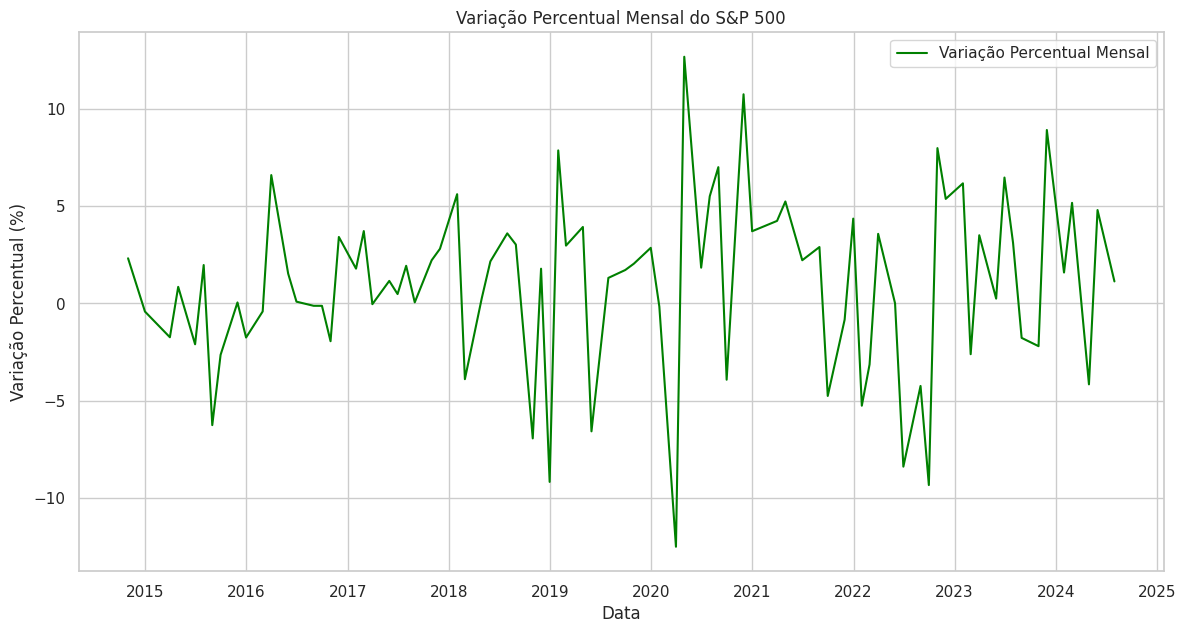

In [8]:
# variação percentual mensal
df_index['Monthly Change'] = df_index['S&P500'].resample('M').ffill().pct_change() * 100


# Gráfico da variação percentual mensal
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_index.index, y=df_index['Monthly Change'], color='green', label='Variação Percentual Mensal')
plt.title('Variação Percentual Mensal do S&P 500')
plt.xlabel('Data')
plt.ylabel('Variação Percentual (%)')
plt.legend()
plt.grid(True)
plt.show()